# Modeling

In [5]:

#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
import re
from numpy.random import normal
from scipy.stats import kurtosis, skew
import math
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from six import StringIO 
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from IPython.display import Image
import pydotplus
import warnings
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv('modelingdata')
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7041 entries, 0 to 7040
Data columns (total 23 columns):
is_explicit         7041 non-null int64
track_id            7041 non-null object
danceability        7041 non-null float64
energy              7041 non-null float64
key                 7041 non-null int64
loudness            7041 non-null float64
mode                7041 non-null int64
speechiness         7041 non-null float64
acousticness        7041 non-null float64
instrumentalness    7041 non-null float64
liveness            7041 non-null float64
valence             7041 non-null float64
tempo               7041 non-null float64
duration_ms         7041 non-null int64
genres              7041 non-null object
ratings             7041 non-null int64
decade_1960         7041 non-null int64
decade_1970         7041 non-null int64
decade_1980         7041 non-null int64
decade_1990         7041 non-null int64
decade_2000         7041 non-null int64
decade_2010         7041 non-null

In [16]:
data = data.drop(['track_id', 'genres', 'genrecategory'], axis=1)

## Functions

In [42]:
def model_fit(trainx, trainy, testx, testy, model, name):  
    
    model.fit(trainx, trainy)

    test_prediction = model.predict(testx)
    train_prediction = model.predict(trainx)
    
    result = {'model': name}
    
    result['train_accuracy'] = np.around((accuracy_score(trainy, train_prediction)), decimals=3)
    result['train_precision'] = np.around((precision_score(trainy, train_prediction, average='micro')), decimals=3)
    result['train_recall'] = np.around((recall_score(trainy, train_prediction, average='micro')), decimals=3)
    result['train_f1'] = np.around((f1_score(trainy, train_prediction, average='micro')), decimals=3)
    
    result['test_accuracy'] = np.around((accuracy_score(testy, test_prediction)), decimals=3)
    result['test_precision'] = np.around((precision_score(testy, test_prediction, average='micro')), decimals=3)
    result['test_recall'] = np.around((recall_score(testy, test_prediction, average='micro')), decimals=3)
    result['test_f1'] = np.around((f1_score(testy, test_prediction, average='micro')), decimals=3)
    
    print("\n")
    
    print("Train Score Results")
    print(classification_report(trainy, train_prediction))       
    print("Train Set Accuracy:", result['train_accuracy'])
    print("Train Set Precision:", result['train_precision'])
    print("Train Set Recall:", result['train_recall'])
    print("Train Set F1-Score:", result['train_f1'])

    print("\n")
    
    print("Test Score Results")    
    print(classification_report(testy, test_prediction)) 
                                      
    print("Test Set Accuracy:", result['test_accuracy'])  
    print("Test Set Precision:", result['test_precision']) 
    print("Test Set Recall:", result['test_recall'])
    print("Test Set F1-Score:", result['test_f1'])
                                      
    
    print("\n")
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    trainmatrix = plot_confusion_matrix(model, trainx, trainy, cmap=plt.cm.Blues, ax=ax1)
    testmatrix = plot_confusion_matrix(model, testx, testy, cmap=plt.cm.Blues, ax=ax2)
    ax1.set_title('Train Confusion Matrix')
    ax2.set_title('Test Confusion Matrix')
    plt.tight_layout()
    plt.show()
    
    return result

In [7]:
# function for plotting a feature importance histogram 
def features_plot(df, title):
    df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = df, orient = 'h', color = 'blue') \
       .set_title(title, fontsize = 20)

In [51]:
#Function for creating a feature importance dataframe
def features_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

## Train Test Split

In [17]:
#Explore the class distribution of the target variable "ratings"
data['ratings'].value_counts()

3    2648
2    1981
4    1287
1     916
5     209
Name: ratings, dtype: int64

In [18]:
#Set X and y values 
y = data['ratings']
X = data.drop(['ratings'], axis=1)

In [19]:
#Investigate the value counts of our target variable 
y.value_counts(normalize=True)

3    0.376083
2    0.281352
4    0.182787
1    0.130095
5    0.029683
Name: ratings, dtype: float64

In [20]:
#Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Section A: Vanilla Models

### 1. KNN Model

In [22]:
#Scale the data
scaler = StandardScaler()  
scaler.fit(X_train)

#Scale original X_train and X_test
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)


In [23]:
#Fit and predict the vanilla model
knnmodel = KNeighborsClassifier()



Train Score Results
              precision    recall  f1-score   support

           1       0.49      0.46      0.47       683
           2       0.51      0.64      0.57      1491
           3       0.58      0.64      0.61      1981
           4       0.58      0.35      0.44       972
           5       0.43      0.07      0.11       153

    accuracy                           0.55      5280
   macro avg       0.52      0.43      0.44      5280
weighted avg       0.55      0.55      0.53      5280

Train Set Accuracy: 0.545
Train Set Precision: 0.545
Train Set Recall: 0.545
Train Set F1-Score: 0.545


Test Score Results
              precision    recall  f1-score   support

           1       0.13      0.12      0.13       233
           2       0.29      0.39      0.34       490
           3       0.37      0.38      0.37       667
           4       0.34      0.21      0.26       315
           5       0.00      0.00      0.00        56

    accuracy                           

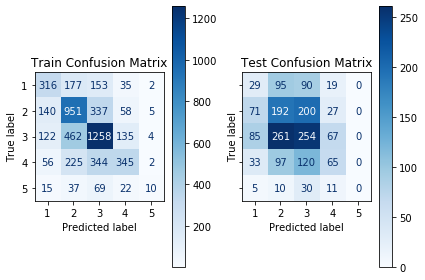

In [43]:
#Apply the model and print metrics
knnresult = model_fit(X_train_scaled, y_train, X_test_scaled, y_test, knnmodel, 'knn')

### 2. Bayes Classification Model

In [44]:
#Instansiate the vanilla model
bayes = GaussianNB()



Train Score Results
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       683
           2       0.44      0.01      0.01      1491
           3       0.37      0.99      0.54      1981
           4       0.27      0.01      0.01       972
           5       0.00      0.00      0.00       153

    accuracy                           0.37      5280
   macro avg       0.22      0.20      0.11      5280
weighted avg       0.32      0.37      0.21      5280

Train Set Accuracy: 0.375
Train Set Precision: 0.375
Train Set Recall: 0.375
Train Set F1-Score: 0.375


Test Score Results
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       233
           2       0.40      0.00      0.01       490
           3       0.38      0.99      0.55       667
           4       0.33      0.01      0.01       315
           5       0.00      0.00      0.00        56

    accuracy                           

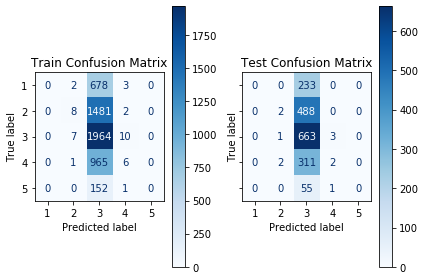

In [46]:
#Apply the modelfit function
bayesresult = model_fit(X_train, y_train, X_test, y_test, bayes, 'bayes')

### 3. Decision Tree Classifier

In [47]:
#Instansiate the vanilla model 
decisiontree = DecisionTreeClassifier(random_state=42)



Train Score Results
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       683
           2       0.99      1.00      1.00      1491
           3       1.00      0.99      1.00      1981
           4       1.00      1.00      1.00       972
           5       1.00      0.97      0.99       153

    accuracy                           1.00      5280
   macro avg       1.00      0.99      0.99      5280
weighted avg       1.00      1.00      1.00      5280

Train Set Accuracy: 0.996
Train Set Precision: 0.996
Train Set Recall: 0.996
Train Set F1-Score: 0.996


Test Score Results
              precision    recall  f1-score   support

           1       0.14      0.14      0.14       233
           2       0.31      0.32      0.31       490
           3       0.42      0.40      0.41       667
           4       0.27      0.29      0.28       315
           5       0.07      0.07      0.07        56

    accuracy                           

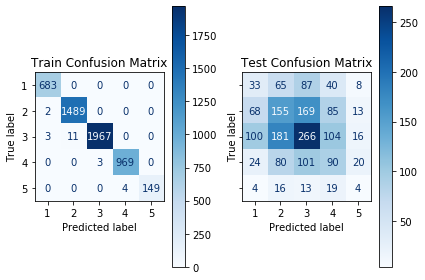

In [48]:
#Apply the model fit function 
decisiontreeresult = model_fit(X_train, y_train, X_test, y_test, decisiontree, 'decisiontree')

In [52]:
#Look at feature importances of our decision tree 
features = features_df(X_train.columns, decisiontree.feature_importances_)
features

,feature,feature_importance
0,duration_ms,0.113209
1,liveness,0.107747
2,speechiness,0.094846
3,acousticness,0.093257
4,valence,0.092032
5,loudness,0.088309
6,danceability,0.086876
7,tempo,0.083283
8,energy,0.074828
9,instrumentalness,0.063814


### 4. Ensemble Methods

#### a. Bagging Method

In [53]:
#Instansiate the vanilla model
bagged_tree = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=20)



Train Score Results
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       683
           2       0.99      0.99      0.99      1491
           3       0.99      1.00      0.99      1981
           4       0.99      1.00      1.00       972
           5       0.99      0.98      0.99       153

    accuracy                           0.99      5280
   macro avg       0.99      0.99      0.99      5280
weighted avg       0.99      0.99      0.99      5280

Train Set Accuracy: 0.995
Train Set Precision: 0.995
Train Set Recall: 0.995
Train Set F1-Score: 0.995


Test Score Results
              precision    recall  f1-score   support

           1       0.16      0.06      0.09       233
           2       0.33      0.38      0.35       490
           3       0.40      0.51      0.45       667
           4       0.36      0.26      0.30       315
           5       0.00      0.00      0.00        56

    accuracy                           

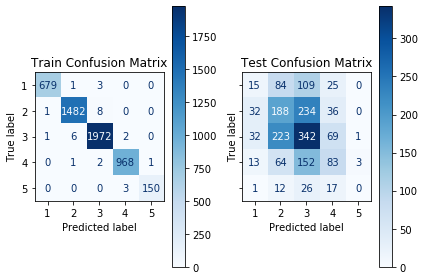

In [54]:
#Apply the model prediction
baggingresult = model_fit(X_train, y_train, X_test, y_test, bagged_tree, 'bagging')

#### b. Random Forest Classifier

In [55]:
#Instansiate the vanilla model 
randomforest = RandomForestClassifier(random_state=42)



Train Score Results
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       683
           2       1.00      1.00      1.00      1491
           3       0.99      1.00      1.00      1981
           4       1.00      0.99      1.00       972
           5       0.99      0.99      0.99       153

    accuracy                           1.00      5280
   macro avg       0.99      0.99      0.99      5280
weighted avg       1.00      1.00      1.00      5280

Train Set Accuracy: 0.996
Train Set Precision: 0.996
Train Set Recall: 0.996
Train Set F1-Score: 0.996


Test Score Results
              precision    recall  f1-score   support

           1       0.14      0.02      0.03       233
           2       0.34      0.36      0.35       490
           3       0.39      0.62      0.48       667
           4       0.41      0.21      0.28       315
           5       0.00      0.00      0.00        56

    accuracy                           

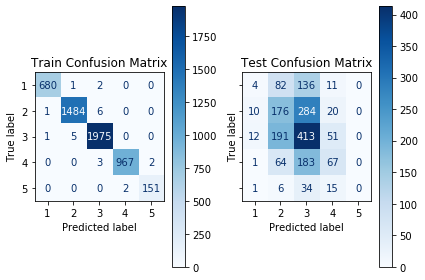

In [56]:
#Apply the model_fit function 
randomforestresult = model_fit(X_train, y_train, X_test, y_test, randomforest, 'randomforest')

In [57]:
#Look at another performance measure: mean 3-Fold cross validation score 
mean_rf_cv_score = np.mean(cross_val_score(randomforest, X_train, y_train, cv=3))
mean_rf_cv_score

0.38560606060606056

## 5. Boosting

### a. Adaboost

In [59]:
#Instansiate the vanilla model
adb = AdaBoostClassifier(random_state=0)



Train Score Results
              precision    recall  f1-score   support

           1       0.29      0.01      0.03       683
           2       0.37      0.32      0.34      1491
           3       0.40      0.67      0.50      1981
           4       0.42      0.25      0.31       972
           5       0.12      0.03      0.04       153

    accuracy                           0.39      5280
   macro avg       0.32      0.25      0.24      5280
weighted avg       0.37      0.39      0.34      5280

Train Set Accuracy: 0.388
Train Set Precision: 0.388
Train Set Recall: 0.388
Train Set F1-Score: 0.388


Test Score Results
              precision    recall  f1-score   support

           1       0.22      0.01      0.02       233
           2       0.31      0.27      0.29       490
           3       0.37      0.64      0.47       667
           4       0.37      0.19      0.25       315
           5       0.05      0.02      0.03        56

    accuracy                           

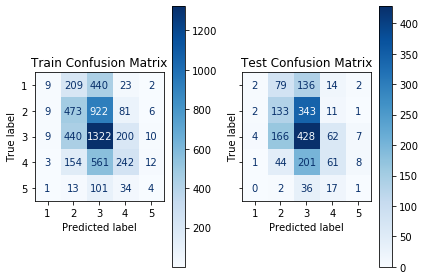

In [60]:
#Fit and predict model and show results
adbresult = model_fit(X_train, y_train, X_test, y_test, adb, 'Adaboost')



Train Score Results
              precision    recall  f1-score   support

           1       0.29      0.01      0.03       683
           2       0.37      0.32      0.34      1491
           3       0.40      0.67      0.50      1981
           4       0.42      0.25      0.31       972
           5       0.12      0.03      0.04       153

    accuracy                           0.39      5280
   macro avg       0.32      0.25      0.24      5280
weighted avg       0.37      0.39      0.34      5280

Train Set Accuracy: 0.388
Train Set Precision: 0.388
Train Set Recall: 0.388
Train Set F1-Score: 0.388


Test Score Results
              precision    recall  f1-score   support

           1       0.22      0.01      0.02       233
           2       0.31      0.27      0.29       490
           3       0.37      0.64      0.47       667
           4       0.37      0.19      0.25       315
           5       0.05      0.02      0.03        56

    accuracy                           

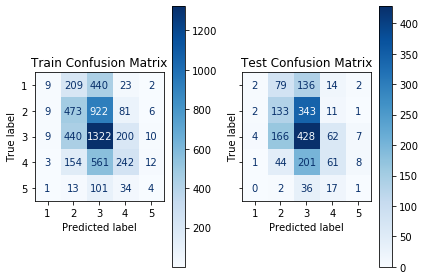

In [62]:
#Fit and predict model and show results
adbresult = model_fit(X_train, y_train, X_test, y_test, adb, 'Adaboost')

### b. Gradient Boosting

In [63]:
#Instansiate the vanilla model
gb = GradientBoostingClassifier(random_state=42)



Train Score Results
              precision    recall  f1-score   support

           1       0.88      0.17      0.29       683
           2       0.60      0.49      0.54      1491
           3       0.51      0.88      0.64      1981
           4       0.73      0.35      0.48       972
           5       1.00      0.35      0.52       153

    accuracy                           0.56      5280
   macro avg       0.74      0.45      0.49      5280
weighted avg       0.64      0.56      0.53      5280

Train Set Accuracy: 0.565
Train Set Precision: 0.565
Train Set Recall: 0.565
Train Set F1-Score: 0.565


Test Score Results
              precision    recall  f1-score   support

           1       0.11      0.01      0.02       233
           2       0.32      0.24      0.28       490
           3       0.39      0.71      0.50       667
           4       0.39      0.17      0.24       315
           5       0.00      0.00      0.00        56

    accuracy                           

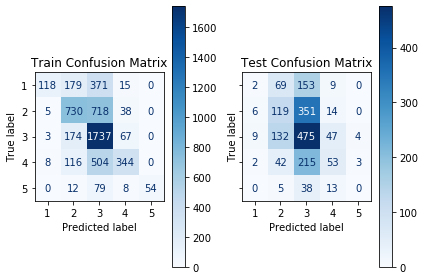

In [64]:
#Fit and predict model and show results
gbresult = model_fit(X_train, y_train, X_test, y_test, gb, 'Gradient_Boosting')

In [65]:
#Look at another performance measure: mean 3-Fold cross validation score 
gb_mean_cv = cross_val_score(gb, X, y, cv=3).mean()

print(f"Mean Adaboost Cross-Val Score (k=3): {gb_mean_cv: .2%}")

Mean Adaboost Cross-Val Score (k=3):  35.53%


### c. XGBoost

In [66]:
#Instansiate the vanilla model
xgb = XGBClassifier(random_state=0)



Train Score Results
              precision    recall  f1-score   support

           1       0.78      0.06      0.11       683
           2       0.54      0.40      0.46      1491
           3       0.46      0.87      0.60      1981
           4       0.66      0.27      0.39       972
           5       1.00      0.03      0.06       153

    accuracy                           0.50      5280
   macro avg       0.69      0.33      0.32      5280
weighted avg       0.58      0.50      0.44      5280

Train Set Accuracy: 0.497
Train Set Precision: 0.497
Train Set Recall: 0.497
Train Set F1-Score: 0.497


Test Score Results
              precision    recall  f1-score   support

           1       0.29      0.01      0.02       233
           2       0.34      0.24      0.28       490
           3       0.39      0.76      0.52       667
           4       0.41      0.14      0.21       315
           5       0.00      0.00      0.00        56

    accuracy                           

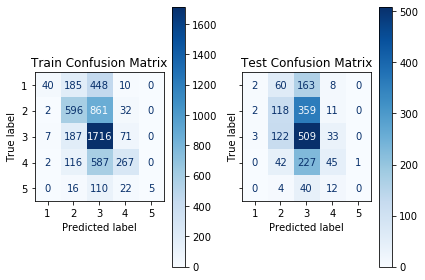

In [68]:
#Fit and predict model and show results
xgbresult = model_fit(X_train, y_train, X_test, y_test, xgb, 'XGBoost')


In [69]:
#Investigate XGB cross val score 
xgb_mean_cv = cross_val_score(xgb, X, y, cv=3).mean()

print(f"Mean XGboost Cross-Val Score (k=3): {xgb_mean_cv: .2%}")

Mean XGboost Cross-Val Score (k=3):  35.58%


In [70]:
#Look at feature importance for the XGBoost model 
xgb_features = features_df(X_train.columns, xgb.feature_importances_)
xgb_features

,feature,feature_importance
0,decade_2010,0.219962
1,decade_2000,0.102099
2,is_explicit,0.059968
3,instrumentalness,0.050740
4,decade_1990,0.048737
5,duration_ms,0.044729
6,loudness,0.043692
7,acousticness,0.041063
8,decade_1970,0.041044
9,valence,0.040696


## 6. Support Vector Machines